In [1]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: six in c:\users\samil\anaconda3\lib\site-packages (from packaging>=20.0->matplotlib) (1.15.0)



In [4]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Samil\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [5]:
raw_dataset=pd.read_csv("Doublet_EAF_35F3.csv",sep=",")

In [6]:
 Doublet_EAF_35F3= raw_dataset.copy()
Doublet_EAF_35F3.head()

,Date,Longitude,Latitude,Depth,Magnitude
0,05/02/2023 04:16:52,36.044,37.411,7.08,2.0
1,04/02/2023 08:22:17,36.356,37.390,7.00,2.7
2,03/02/2023 22:43:10,38.814,38.274,6.57,2.5
3,03/02/2023 22:06:30,36.360,37.230,7.02,2.1
4,03/02/2023 11:37:12,36.395,37.201,7.01,2.2


In [7]:
Doublet_EAF_35F3.shape

(52, 5)

In [34]:
x = Doublet_EAF_35F3.iloc[:,1].values
y = Doublet_EAF_35F3.iloc[:,2].values
z = Doublet_EAF_35F3.iloc[:,3].values
colors = Doublet_EAF_35F3.iloc[:,4].values
sizes = Doublet_EAF_35F3.iloc[:,4].values*50

In [35]:
import plotly.graph_objects as go

# Obtain high-resolution world map data online
fig = go.Figure(go.Choroplethmapbox(
    geojson="https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json",
    locations=["USA", "CAN", "MEX", "RUS", "CHN"],  # Example country codes (USA, Canada, Mexico, Russia, China)
    z=[1, 1, 1, 1, 1],  # Values to be assigned to countries (all set to 1)
    colorscale='Jet',  # Color scale name (Viridis, YlGnBu, Jet, etc.)
    zmin=2,
    zmax=5,
    marker_opacity=0.9,  # Opacity of country borders
    marker_line_width=1,  # Thickness of country borders
))

# Create sample earthquake data
earthquake_data = {
    'Longitude': x,
    'Latitude': y,
    'Magnitude': colors,
}

# Add earthquake data with Scatter plot
fig.add_trace(go.Scattermapbox(
    lat=earthquake_data['Latitude'],
    lon=earthquake_data['Longitude'],
    mode='markers',
    marker=dict(
        size=earthquake_data['Magnitude'] * 5,  # Set point sizes based on Magnitude value
        color=earthquake_data['Magnitude'],  # Set color scale based on Magnitude value
        colorscale='Jet',  # Color scale name (Viridis, YlGnBu, Jet, etc.)
    ),
))

# Specify map layout and style
fig.update_layout(
    mapbox_style="open-street-map",  # Set map style (for other styles: "open-street-map", "stamen-terrain", etc.)
    mapbox_zoom=6,  # Set map zoom level
    mapbox_center={"lat": 37.000, "lon": 37.0000},  # Set map center (center of the USA)
)

# Increase resolution and font size
fig.update_layout(
    width=845,  # Set width to increase resolution
    height=640,  # Set height to increase resolution
    font=dict(
        size=25  # Set font size for English comments
    )
)

# Display the plot
fig.show()

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display



# İnteraktif işlev

def plot_3d_scatter(elev, azim, zoom, theta):
    fig = plt.figure(figsize=(12, 10)) 
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet')
    cbar = plt.colorbar(ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet'))    
    cbar.set_label('Magnitude')  

    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Depth_km')  
    ax.dist = zoom  # Zoom ayarı
    ax.azim = theta  # Maus ile çevirme
    plt.show()

# İnteraktif widget'ı oluşturma
elev_slider = widgets.IntSlider(min=0, max=180, value=30, description='Elevation:')
azim_slider = widgets.IntSlider(min=0, max=360, value=30, description='Azimuth:')
zoom_slider = widgets.FloatSlider(min=1, max=10, value=5, description='Zoom:')
theta_slider = widgets.IntSlider(min=0, max=360, value=30, description='Theta:')
interactive_plot = interactive(plot_3d_scatter, elev=elev_slider, azim=azim_slider, zoom=zoom_slider, theta=theta_slider)

# Widget'ı görüntüleme
display(interactive_plot)

interactive(children=(IntSlider(value=30, description='Elevation:', max=180), IntSlider(value=30, description=…

In [31]:
x = Doublet_EAF_35F3.iloc[:,1].values
y = Doublet_EAF_35F3.iloc[:,2].values
z = Doublet_EAF_35F3.iloc[:,0].values
colors = Doublet_EAF_35F3.iloc[:,4].values
sizes = Doublet_EAF_35F3.iloc[:,4].values*20

In [12]:
z

array(['05/02/2023 04:16:52', '04/02/2023 08:22:17',
       '03/02/2023 22:43:10', '03/02/2023 22:06:30',
       '03/02/2023 11:37:12', '03/02/2023 11:05:08',
       '01/02/2023 07:02:04', '31/01/2023 03:24:58',
       '30/01/2023 05:16:45', '29/01/2023 16:12:39',
       '29/01/2023 03:02:06', '26/01/2023 08:44:47',
       '25/01/2023 23:38:56', '25/01/2023 08:06:25',
       '25/01/2023 06:06:11', '25/01/2023 05:21:23',
       '25/01/2023 00:57:36', '24/01/2023 21:40:44',
       '22/01/2023 02:28:39', '21/01/2023 20:47:12',
       '21/01/2023 10:51:47', '21/01/2023 02:26:54',
       '20/01/2023 23:03:59', '19/01/2023 23:04:28',
       '18/01/2023 13:30:47', '17/01/2023 18:22:40',
       '17/01/2023 04:12:30', '16/01/2023 00:46:33',
       '15/01/2023 05:59:25', '15/01/2023 04:32:37',
       '15/01/2023 04:29:04', '15/01/2023 04:07:27',
       '15/01/2023 03:39:37', '15/01/2023 03:36:26',
       '13/01/2023 23:02:44', '13/01/2023 20:44:08',
       '13/01/2023 19:48:04', '13/01/2023 18:2

In [13]:
from datetime import datetime

# Zaman damgalarını içeren bir liste oluştur
timestamps = z

# Zaman damgalarını saniyeye dönüştür
seconds = [datetime.timestamp(datetime.strptime(timestamp, '%d/%m/%Y %H:%M:%S')) for timestamp in timestamps]

print(seconds) # Saniye cinsinden zaman damgalarını görüntüle


[1675559812.0, 1675488137.0, 1675453390.0, 1675451190.0, 1675413432.0, 1675411508.0, 1675224124.0, 1675124698.0, 1675045005.0, 1674997959.0, 1674950526.0, 1674711887.0, 1674679136.0, 1674623185.0, 1674615971.0, 1674613283.0, 1674597456.0, 1674585644.0, 1674343719.0, 1674323232.0, 1674287507.0, 1674257214.0, 1674245039.0, 1674158668.0, 1674037847.0, 1673968960.0, 1673917950.0, 1673819193.0, 1673751565.0, 1673746357.0, 1673746144.0, 1673744847.0, 1673743177.0, 1673742986.0, 1673640164.0, 1673631848.0, 1673628484.0, 1673623784.0, 1673583362.0, 1673545249.0, 1673430093.0, 1673267139.0, 1673260074.0, 1673254420.0, 1673233062.0, 1673215917.0, 1673121507.0, 1673113662.0, 1672957263.0, 1672915715.0, 1672893788.0, 1672893663.0]


In [14]:
seconds 

[1675559812.0,
 1675488137.0,
 1675453390.0,
 1675451190.0,
 1675413432.0,
 1675411508.0,
 1675224124.0,
 1675124698.0,
 1675045005.0,
 1674997959.0,
 1674950526.0,
 1674711887.0,
 1674679136.0,
 1674623185.0,
 1674615971.0,
 1674613283.0,
 1674597456.0,
 1674585644.0,
 1674343719.0,
 1674323232.0,
 1674287507.0,
 1674257214.0,
 1674245039.0,
 1674158668.0,
 1674037847.0,
 1673968960.0,
 1673917950.0,
 1673819193.0,
 1673751565.0,
 1673746357.0,
 1673746144.0,
 1673744847.0,
 1673743177.0,
 1673742986.0,
 1673640164.0,
 1673631848.0,
 1673628484.0,
 1673623784.0,
 1673583362.0,
 1673545249.0,
 1673430093.0,
 1673267139.0,
 1673260074.0,
 1673254420.0,
 1673233062.0,
 1673215917.0,
 1673121507.0,
 1673113662.0,
 1672957263.0,
 1672915715.0,
 1672893788.0,
 1672893663.0]

In [15]:
x = Doublet_EAF_35F3.iloc[:,1].values
y = Doublet_EAF_35F3.iloc[:,2].values
z = seconds 
colors = Doublet_EAF_35F3.iloc[:,4].values
sizes = Doublet_EAF_35F3.iloc[:,4].values*50

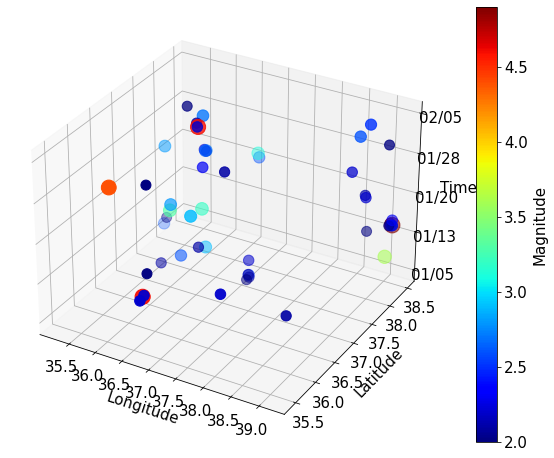

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from datetime import datetime

# Assuming Doublet_EAF_35F3 is a DataFrame with appropriate columns
x = Doublet_EAF_35F3.iloc[:, 1].values
y = Doublet_EAF_35F3.iloc[:, 2].values
z = seconds 
colors = Doublet_EAF_35F3.iloc[:, 4].values
sizes = Doublet_EAF_35F3.iloc[:, 4].values * 50

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet')

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Magnitude')

# Labeling axes
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time')

# Formatting time ticks
# Assuming seconds is a list or array of time values
# Adjust the ticks and labels according to your data
time_ticks = np.linspace(min(seconds), max(seconds), 5)
time_labels = [datetime.fromtimestamp(t).strftime('%m/%d') for t in time_ticks]  # Format güncellendi
ax.set_zticks(time_ticks)
ax.set_zticklabels(time_labels)

# Adjust font size
plt.rc('font', size=15)

plt.show()
